In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.utils import resample
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, MaxPool1D, Convolution1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random

In [3]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datafiles/combined_train.csv", header=None)
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datafiles/combined_test.csv", header=None)

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.utils import resample
import random
import matplotlib.pyplot as plt
import seaborn as sns
train_lbl0 = resample(train[train[187]==0], replace=True, n_samples=15000, random_state=113)
train_lbl1 = resample(train[train[187]==1], replace=True, n_samples=15000, random_state=113)
train_lbl2 = resample(train[train[187]==2], replace=True, n_samples=15000, random_state=113)
train_lbl3 = resample(train[train[187]==3], replace=True, n_samples=15000, random_state=113)
train_lbl4 = resample(train[train[187]==4], replace=True, n_samples=15000, random_state=113)
train_lbl5 = resample(train[train[187]==5], replace=True, n_samples=15000, random_state=113)
train_lbl6 = resample(train[train[187]==6], replace=True, n_samples=15000, random_state=113)

In [5]:
train= pd.concat([train_lbl0, train_lbl1, train_lbl2, train_lbl3, train_lbl4, train_lbl5, train_lbl6])

labels = train[187].astype('int64')   # last column has the labels

print("Count in each label: ")
print(labels.value_counts())

Count in each label: 
0    15000
1    15000
2    15000
3    15000
4    15000
5    15000
6    15000
Name: 187, dtype: int64


In [6]:
#Fining the outliers
continous_features =   train[187].unique()
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5 
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            train.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
outliers(train[continous_features])

For the feature 0, No of Outliers is 14339
For the feature 1, No of Outliers is 5324
For the feature 2, No of Outliers is 0
For the feature 3, No of Outliers is 555
For the feature 4, No of Outliers is 6583
For the feature 5, No of Outliers is 5258
For the feature 6, No of Outliers is 4124


In [7]:
#Removing the outliers
outliers(train[continous_features], drop=True)

Outliers from 0 feature removed
Outliers from 1 feature removed
Outliers from 2 feature removed
Outliers from 3 feature removed
Outliers from 4 feature removed
Outliers from 5 feature removed
Outliers from 6 feature removed


In [8]:
#Fining the outliers
continous_features =   test[187].unique()
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5 
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            test.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
outliers(test[continous_features])

For the feature 0, No of Outliers is 3220
For the feature 1, No of Outliers is 1306
For the feature 2, No of Outliers is 0
For the feature 3, No of Outliers is 708
For the feature 4, No of Outliers is 1983
For the feature 5, No of Outliers is 1256
For the feature 6, No of Outliers is 943


In [9]:
#Removing the outliers
outliers(test[continous_features], drop=True)

Outliers from 0 feature removed
Outliers from 1 feature removed
Outliers from 2 feature removed
Outliers from 3 feature removed
Outliers from 4 feature removed
Outliers from 5 feature removed
Outliers from 6 feature removed


In [10]:
#Feature Scaling for train and test data
x_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values

x_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

#**Random Forest Classifier**

In [11]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 0)
RFC.fit(x_train, y_train)    

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [12]:
pred_RFC = RFC.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

cm_RFC = confusion_matrix(y_test, pred_RFC)
print(cm_RFC)
a_RFC = accuracy_score(y_test, pred_RFC)
print("Accuarcy of the model",a_RFC)
print(classification_report(y_test, pred_RFC))

[[15297   117    43    24    17   407   132]
 [   88   368     0     0     1    17     1]
 [   34     0   350    13     2    22     1]
 [   17     0    10    96     0     1     0]
 [   20     2     2     0   281     7     0]
 [  156     3     8     1     2  1940    43]
 [   35     0     0     0     0    40   924]]
Accuarcy of the model 0.9383101062274632
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97     16037
         1.0       0.75      0.77      0.76       475
         2.0       0.85      0.83      0.84       422
         3.0       0.72      0.77      0.74       124
         4.0       0.93      0.90      0.91       312
         5.0       0.80      0.90      0.85      2153
         6.0       0.84      0.92      0.88       999

    accuracy                           0.94     20522
   macro avg       0.84      0.87      0.85     20522
weighted avg       0.94      0.94      0.94     20522



#**KNeighbors Classificatin**

In [14]:
#Kneighbors
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
KNN.fit(x_train, y_train)    

KNeighborsClassifier(n_neighbors=15)

In [15]:
pred_KNN = KNN.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

cm_KNN = confusion_matrix(y_test, pred_KNN)
print(cm_KNN)
a_KNN = accuracy_score(y_test, pred_KNN)
print("Accuarcy of the model",a_KNN)
print(classification_report(y_test, pred_KNN))

[[13060  1111   133   433    44   508   748]
 [   38   400     8     6     1    11    11]
 [   15    17   342    34     0     8     6]
 [    5     2     4   111     0     1     1]
 [   18    11     6     2   273     2     0]
 [  117    83    14     7     3  1648   281]
 [   30     6     0     0     0    38   925]]
Accuarcy of the model 0.8166358054770491
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89     16037
         1.0       0.25      0.84      0.38       475
         2.0       0.67      0.81      0.74       422
         3.0       0.19      0.90      0.31       124
         4.0       0.85      0.88      0.86       312
         5.0       0.74      0.77      0.75      2153
         6.0       0.47      0.93      0.62       999

    accuracy                           0.82     20522
   macro avg       0.59      0.85      0.65     20522
weighted avg       0.90      0.82      0.84     20522



#**Support Vector Machine**

In [17]:
#Training the SVM model 
from sklearn.svm import SVC
SVM = SVC(kernel = 'poly', degree=3, probability=True)
SVM.fit(x_train, y_train)

SVC(kernel='poly', probability=True)

In [18]:
pred_SVM = SVM.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

cm_SVM = confusion_matrix(y_test, pred_SVM)
print(cm_SVM)
a_SVM = accuracy_score(y_test, pred_SVM)
print("Accuarcy of the model",a_SVM)
print(classification_report(y_test, pred_SVM))

[[12853   603   134   658    34  1086   669]
 [   58   390     6     4     0    12     5]
 [   15     7   344    47     1     7     1]
 [    4     2     0   118     0     0     0]
 [   23     4     3     2   278     2     0]
 [  168    28    34     3     5  1679   236]
 [   31     0     3     0     0    42   923]]
Accuarcy of the model 0.8081570996978852
              precision    recall  f1-score   support

         0.0       0.98      0.80      0.88     16037
         1.0       0.38      0.82      0.52       475
         2.0       0.66      0.82      0.73       422
         3.0       0.14      0.95      0.25       124
         4.0       0.87      0.89      0.88       312
         5.0       0.59      0.78      0.67      2153
         6.0       0.50      0.92      0.65       999

    accuracy                           0.81     20522
   macro avg       0.59      0.85      0.65     20522
weighted avg       0.89      0.81      0.83     20522



#**Voting Classifier**

In [20]:

#Training voting classifier
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('svm', SVM), ('knn', KNN), ('rfc', RFC)])
model.fit(x_train, y_train)

#Predicting the score
model.score(x_test, y_test)

0.9030308936750804

#**XGBoost**

In [21]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# fit model on training data
model = XGBClassifier()
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set,verbose=True)

# make predictions for test data
predictions = model.predict(x_test)

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

[0]	validation_0-merror:0.362067	validation_0-mlogloss:1.8057	validation_1-merror:0.519101	validation_1-mlogloss:1.88212
[1]	validation_0-merror:0.320645	validation_0-mlogloss:1.6938	validation_1-merror:0.490254	validation_1-mlogloss:1.81951
[2]	validation_0-merror:0.315847	validation_0-mlogloss:1.6012	validation_1-merror:0.491473	validation_1-mlogloss:1.76553
[3]	validation_0-merror:0.311585	validation_0-mlogloss:1.52312	validation_1-merror:0.500536	validation_1-mlogloss:1.72014
[4]	validation_0-merror:0.295178	validation_0-mlogloss:1.45038	validation_1-merror:0.46053	validation_1-mlogloss:1.67451
[5]	validation_0-merror:0.288701	validation_0-mlogloss:1.3891	validation_1-merror:0.459507	validation_1-mlogloss:1.63634
[6]	validation_0-merror:0.28095	validation_0-mlogloss:1.3312	validation_1-merror:0.454731	validation_1-mlogloss:1.59841
[7]	validation_0-merror:0.277866	validation_0-mlogloss:1.28313	validation_1-merror:0.455511	validation_1-mlogloss:1.56629
[8]	validation_0-merror:0.26969

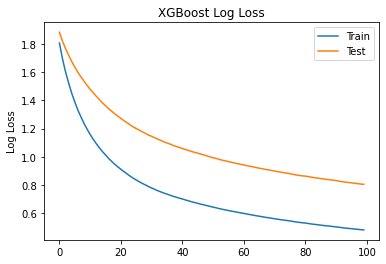

In [22]:
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

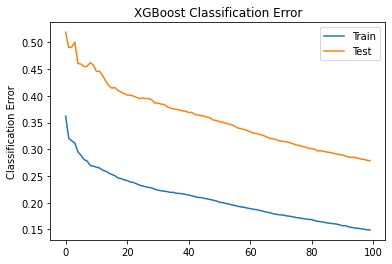

In [23]:
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

#**AdaBoost**

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


max_estimators = 100
ada_boost = AdaBoostClassifier(RandomForestClassifier(max_depth = 1, # Just a stump.
                                      random_state = np.random.RandomState(0)),
                               n_estimators = max_estimators,
                               random_state = np.random.RandomState(0))

# Fit all estimators.
ada_boost.fit(x_train, y_train)


AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=1,
                                                         random_state=RandomState(MT19937) at 0x7F2FB6589AF0),
                   n_estimators=100,
                   random_state=RandomState(MT19937) at 0x7F2FB65899E0)

In [25]:
ada_boost.score(x_test, y_test)

0.4835298703830036

#**ANN**

In [26]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = pd.DataFrame( columns=["Accuracy","Precision","Recall"])
#predictions = np.zeros(shape=(10000,7))
row_index = 0
for i in range(7):
        # bootstrap sampling  
        boot_train = resample(x_train,y_train,replace=True, n_samples=40000, random_state=None)
        model2 = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=x_train[0].shape),
            tf.keras.layers.Dense(256, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(7, activation=tf.nn.softmax)])
  
        # compile the model
        model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

        # Train the model
        model2.fit(x_train,y_train,epochs=5,batch_size=32, validation_data=(x_test,y_test))

Epoch 1/5
2625/2625 [==============================] - 22s 8ms/step - loss: 0.9125 - accuracy: 0.6473 - val_loss: 1.2790 - val_accuracy: 0.3795
Epoch 2/5
2625/2625 [==============================] - 22s 9ms/step - loss: 0.6463 - accuracy: 0.7678 - val_loss: 0.8884 - val_accuracy: 0.6138
Epoch 3/5
2625/2625 [==============================] - 21s 8ms/step - loss: 0.5745 - accuracy: 0.8037 - val_loss: 0.9385 - val_accuracy: 0.6177
Epoch 4/5
2625/2625 [==============================] - 21s 8ms/step - loss: 0.4819 - accuracy: 0.8371 - val_loss: 0.8393 - val_accuracy: 0.6438
Epoch 5/5
2625/2625 [==============================] - 22s 8ms/step - loss: 0.4421 - accuracy: 0.8530 - val_loss: 0.7279 - val_accuracy: 0.7289
Epoch 1/5
2625/2625 [==============================] - 22s 8ms/step - loss: 1.0071 - accuracy: 0.6037 - val_loss: 1.3757 - val_accuracy: 0.1919
Epoch 2/5
2625/2625 [==============================] - 21s 8ms/step - loss: 0.6072 - accuracy: 0.7866 - val_loss: 0.8559 - val_accuracy:

In [27]:
# evaluate the model
import numpy 
cvscores2 = []
scores = model2.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
cvscores2.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores2), numpy.std(cvscores2)))

accuracy: 73.46%
73.46% (+/- 0.00%)


#**CNN**

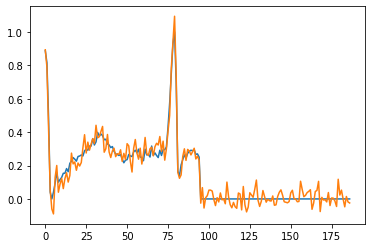

In [28]:
def gaussian_noise(signal):
    noise = np.random.normal(0,0.05,187)
    return signal + noise

sample = train_lbl0.sample(1).values[0]

sample_with_noise = gaussian_noise(sample[:187])

plt.subplot(1, 1, 1)

plt.plot(sample[:187])
plt.plot(sample_with_noise)


ytrain = tensorflow.keras.utils.to_categorical(train[187])
ytest = tensorflow.keras.utils.to_categorical(test[187])

# Input to the model
xtrain = train.values[:, :187]
xtest = test.values[:, :187]

# Adding noise
for i in range(xtrain.shape[0]):
    xtrain[i, :187] = gaussian_noise(xtrain[i, :187])

In [29]:
xtrain = np.expand_dims(xtrain, 2)
xtest = np.expand_dims(xtest, 2)

print("Shape of training data: ")
print("Input: ", xtrain.shape)
print("Output: ", ytrain.shape)

print("\nShape of test data: ")
print("Input: ", xtest.shape)
print("Output: ", ytest.shape)

Shape of training data: 
Input:  (83990, 187, 1)
Output:  (83990, 7)

Shape of test data: 
Input:  (20522, 187, 1)
Output:  (20522, 7)


In [30]:
model = Sequential()
model.add(Conv1D(64, 6, activation = 'relu', input_shape = xtrain[0].shape))
model.add(MaxPool1D(3, 2))

model.add(Conv1D(64, 6, activation = 'relu'))
model.add(MaxPool1D(3, 2))

model.add(Conv1D(64, 6, activation = 'relu'))
model.add(MaxPool1D(3, 2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))

model.compile(optimizer = tensorflow.keras.optimizers.Adam(0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 182, 64)           448       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 90, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 85, 64)            24640     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 42, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 37, 64)            24640     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 18, 64)          

In [31]:
history = model.fit(xtrain, ytrain, epochs = 8, batch_size = 32, validation_data = (xtest, ytest))


Epoch 1/8
2625/2625 [==============================] - 93s 35ms/step - loss: 0.5454 - accuracy: 0.8018 - val_loss: 0.5695 - val_accuracy: 0.7879
Epoch 2/8
2625/2625 [==============================] - 93s 35ms/step - loss: 0.2591 - accuracy: 0.9076 - val_loss: 0.3584 - val_accuracy: 0.8738
Epoch 3/8
2625/2625 [==============================] - 93s 36ms/step - loss: 0.1892 - accuracy: 0.9329 - val_loss: 0.2542 - val_accuracy: 0.9135
Epoch 4/8
2625/2625 [==============================] - 94s 36ms/step - loss: 0.1527 - accuracy: 0.9452 - val_loss: 0.2761 - val_accuracy: 0.9070
Epoch 5/8
2625/2625 [==============================] - 93s 36ms/step - loss: 0.1267 - accuracy: 0.9555 - val_loss: 0.2468 - val_accuracy: 0.9161
Epoch 6/8
2625/2625 [==============================] - 92s 35ms/step - loss: 0.1095 - accuracy: 0.9608 - val_loss: 0.2103 - val_accuracy: 0.9275
Epoch 7/8
2625/2625 [==============================] - 91s 35ms/step - loss: 0.0977 - accuracy: 0.9657 - val_loss: 0.2364 - val_ac

In [37]:
def plot(history, variable, variable2):
    plt.plot(range(len(history[variable])), history[variable])
    plt.plot(range(len(history[variable2])), history[variable2])
    plt.legend([variable, variable2])
    plt.title(variable)

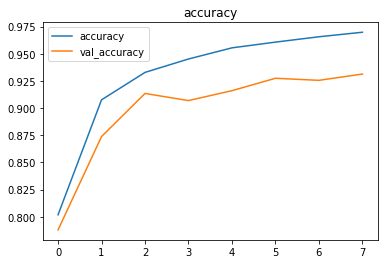

In [38]:

plot(history.history, "accuracy", "val_accuracy")

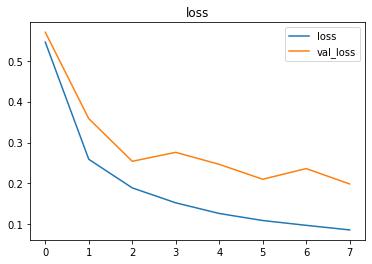

In [39]:
plot(history.history, "loss", "val_loss")

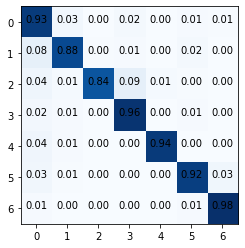

In [40]:
ypred = model.predict(xtest)

cm = confusion_matrix(ytest.argmax(axis=1), ypred.argmax(axis=1))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

for i in range(cm.shape[1]):
    for j in range(cm.shape[0]):
        plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="black")


plt.imshow(cm, cmap=plt.cm.Blues)

In [41]:
print("The distribution of test set labels")
print(test[187].value_counts())

print('F1_score = ', f1_score(ytest.argmax(axis=1), ypred.argmax(axis=1), average = 'macro'))

The distribution of test set labels
0.0    16037
5.0     2153
6.0      999
1.0      475
2.0      422
4.0      312
3.0      124
Name: 187, dtype: int64
F1_score =  0.796310004964335
